[1] "Checking parametric assumptions:"

	Shapiro-Wilk normality test

data:  samp
W = 0.99738, p-value = 0.1076


	Shapiro-Wilk normality test

data:  samp2
W = 0.99887, p-value = 0.7983


	Shapiro-Wilk normality test

data:  samp3
W = 0.99831, p-value = 0.4367


	Bartlett test of homogeneity of variances

data:  list(samp, samp2, samp3)
Bartlett's K-squared = 0.33292, df = 2, p-value = 0.8467

[1] "The sample data met the parametric assumptions."


              Df Sum Sq Mean Sq F value Pr(>F)    
treatments     2  40699   20350   19909 <2e-16 ***
Residuals   2997   3063       1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

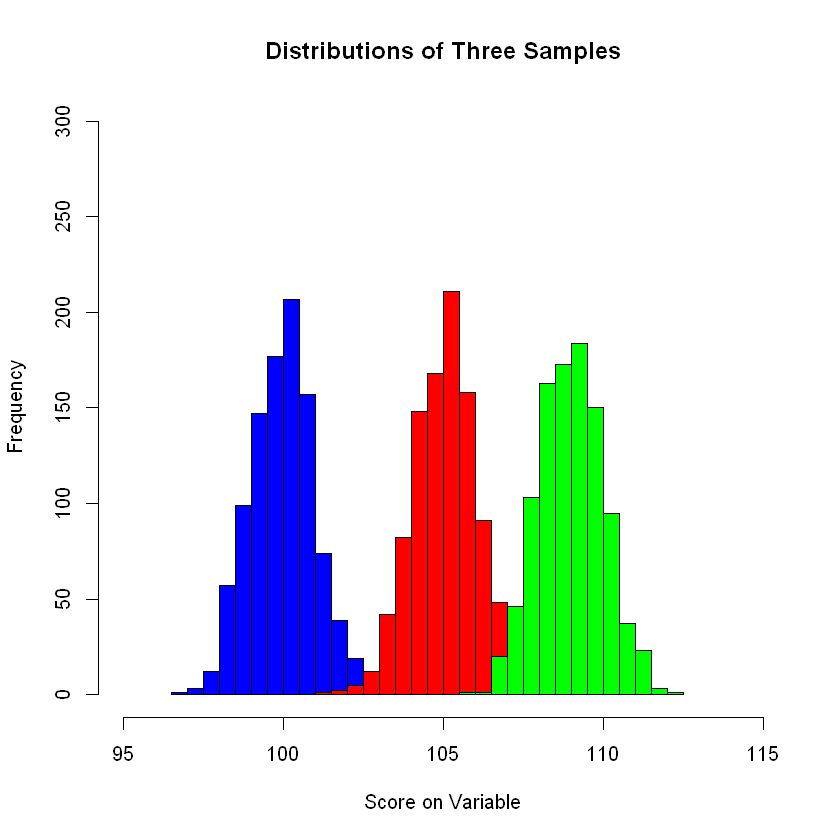

In [17]:
library(lawstat)

# generating three normally distributed populations

pop1 = rnorm(mean = 100, 100000)
pop2 = rnorm(mean = 105, 100000)
pop3 = rnorm(mean = 109, 100000)

# generating a 'coinflip' to decide whether HO will be true or false
coin = c(0,1)
coinflip = sample(coin, size = 1)

# generating a sample from the H0 population if the coinflip == 1

if (coinflip == 1){
    samp = sample(pop1, size = 1000)
    samp2 = sample(pop1, size = 1000)
    samp3 = sample(pop1, size = 1000)
    hist(samp, main = 'Distributions of Three Samples',
        xlab = 'Score on Variable', xlim = c(95,115),ylim = c(0,300), col = 'blue')
    hist(samp2, add = TRUE, col = 'red')
    hist(samp3, add = TRUE, col = 'green')}
   

# generating a sample from a different population if the coinflip == 0

if (coinflip == 0){
    samp = sample(pop1, size = 1000)
    samp2 = sample(pop2, size = 1000)
    samp3 = sample(pop3, size = 1000)
    hist(samp, main = 'Distributions of Three Samples',
        xlab = 'Score on Variable', xlim = c(95,115), ylim = c(0,300), col = 'blue')
    hist(samp2, add = TRUE, col = 'red')
    hist(samp3, add = TRUE, col = 'green')}


# checking the assumptions for the ANOVA

print('Checking parametric assumptions:')
norm_test_1  = shapiro.test(samp)

print(norm_test_1)

norm_test_2  = shapiro.test(samp2)

print(norm_test_2)

norm_test_3  = shapiro.test(samp3)

print(norm_test_3)

barlett_test = bartlett.test(x = list(samp, samp2, samp3))

print(barlett_test)

# performing the ANOVA if the parametric assumptions are met, else generating a warning

if(norm_test_1$p.value >0.05 & norm_test_2$p.value >0.05  & norm_test_2$p.value >0.05 & barlett_test$p.value >0.05 )
    {print('The sample data met the parametric assumptions.')
    df = data.frame(samp,samp2,samp3)

    data = c(t(as.matrix(df)))

    no_treatments = ncol(df)

    no_obs = nrow(df)

    levels = c('treatment_1','treatment_2','treatment_3')

    treatments = gl(no_treatments, 1, no_obs*no_treatments, factor(levels)) 

    anova = aov(data ~ treatments)

    summary(anova)
    }else{print('Parametric assumptions were not met, consider a nonparametric test!')}
